# **Corpus Details**



*   Problem Statement: Implement a Recommender system by choosing a relevant corpus. 
Tasks:
1. Perform EDA on the data. 
2. Preprocess the data
3. Use negihborhood based or Model based collaborative filtering for recommendation
4. Content based recommendation
5. Analyze the results.
6. Use suitable evaluation metrics



*   Corpus Details: The "Job Postings" dataset available on Kaggle contains over 19,000 job postings scraped from a variety of online sources, mainly from Armenian job boards. 

Each job posting in the dataset includes the following information:

job_title: The title of the job position.
job_description: A brief description of the job responsibilities and requirements.
job_responsibilities: A detailed list of the job responsibilities.
job_requirements: A detailed list of the job requirements.
job_salary: The expected salary for the job position.
job_type: The type of employment (full-time, part-time, contract, etc.).
job_category: The category or field of the job position.
job_deadline: The deadline for applications.
job_location: The location of the job position.

*   Source: https://www.kaggle.com/datasets/madhab/jobposts


**Libraries Used**

In [89]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


import re

from nltk.stem import PorterStemmer

nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict



import numpy as np # linear algebra
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
# Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset/datajobposts.csv",index_col=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 1**

**EDA (Exploratory Data Analysis)**

In [91]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Load the dataset
#df = pd.read_csv("job_postings.csv")

# Convert the "job_description" column to a string
df['JobDescription'] = df['JobDescription'].astype(str)

# Combine all job descriptions into a single string
job_descriptions = " ".join(df['JobDescription'])

# Convert the string to lowercase and split it into words
words = job_descriptions.lower().split()

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Count the frequency of each word
word_freq = Counter(words)

# Print the 20 most common words
print(word_freq.most_common(20))


[('responsible', 4727), ('looking', 4298), ('nan', 3892), ('incumbent', 3847), ('position', 3717), ('development', 3547), ('seeking', 3016), ('project', 2821), ('work', 2795), ('software', 2137), ('support', 2051), ('team', 1822), ('armenia', 1817), ('manager', 1713), ('management', 1712), ('-', 1712), ('candidate', 1681), ('llc', 1645), ('implementation', 1503), ('activities', 1463)]


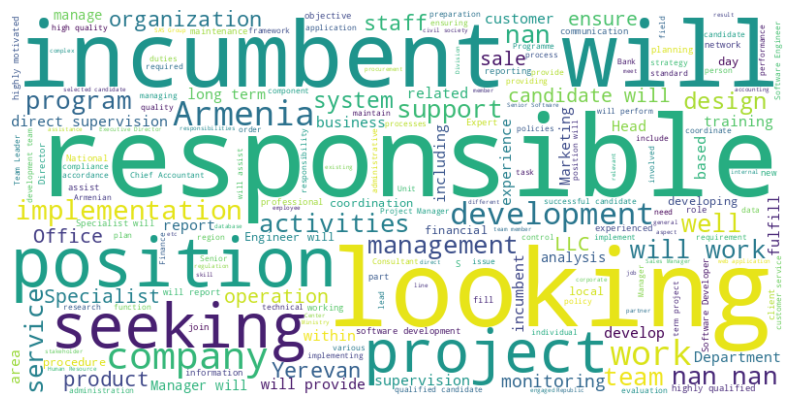

In [92]:

# Convert the "job_description" column to a string
df['JobDescription'] = df['JobDescription'].astype(str)

# Combine all job descriptions into a single string
job_descriptions = " ".join(df['JobDescription'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(job_descriptions)

# Plot the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Section 2**

**Preprocessing Of Data**




In [93]:
#Lowercase all the words in the dataset
df['jobpost'] = df['jobpost'].str.lower()

# display the updated dataset
print(df.head())

                                             jobpost          date  \
0  ameria investment consulting company\r\njob ti...   Jan 5, 2004   
1  international research & exchanges board (irex...   Jan 7, 2004   
2  caucasus environmental ngo network (cenn)\r\nj...   Jan 7, 2004   
3  manoff group\r\njob title:  bcc specialist\r\n...   Jan 7, 2004   
4  yerevan brandy company\r\njob title:  software...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Cauca

In [94]:
#Remove stop words
# create a set of stop words
stop_words = set(stopwords.words('english'))

# remove stop words from the 'descr' column
df['jobpost'] = df['jobpost'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# display the updated dataset
print(df.head())

                                             jobpost          date  \
0  ameria investment consulting company job title...   Jan 5, 2004   
1  international research & exchanges board (irex...   Jan 7, 2004   
2  caucasus environmental ngo network (cenn) job ...   Jan 7, 2004   
3  manoff group job title: bcc specialist positio...   Jan 7, 2004   
4  yerevan brandy company job title: software dev...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Cauca

In [95]:
# Define a function to remove special characters
def remove_special_chars(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace special characters with a space
    text = re.sub(pattern, ' ', text)
    return text

# Apply the function to the 'clean_text' column of the dataframe
df['jobpost'] = df['jobpost'].apply(remove_special_chars)
print(df.head())

                                             jobpost          date  \
0  ameria investment consulting company job title...   Jan 5, 2004   
1  international research   exchanges board  irex...   Jan 7, 2004   
2  caucasus environmental ngo network  cenn  job ...   Jan 7, 2004   
3  manoff group job title  bcc specialist positio...   Jan 7, 2004   
4  yerevan brandy company job title  software dev...  Jan 10, 2004   

                                               Title  \
0                            Chief Financial Officer   
1  Full-time Community Connections Intern (paid i...   
2                                Country Coordinator   
3                                     BCC Specialist   
4                                 Software Developer   

                                           Company AnnouncementCode Term  \
0             AMERIA Investment Consulting Company              NaN  NaN   
1  International Research & Exchanges Board (IREX)              NaN  NaN   
2        Cauca

# **Section 3**

#Methodology

The content-based approach uses the similarity between the job descriptions of different jobs to recommend jobs that are similar to the candidate's preferred job titles and skills. This is achieved by computing the cosine similarity between the TF-IDF vectors of the job descriptions. The assumption is that jobs with similar job descriptions are likely to be similar in terms of the required skills, experience, and job responsibilities.

The constraint knowledge-based approach, on the other hand, uses domain-specific knowledge or constraints to generate job recommendations. In this case, the constraints are the candidate's preferred job titles and skills. The system filters the job listings to find jobs that match the candidate's preferred job titles and then checks if any of the required skills match the candidate's preferred skills. If a match is found, the job is recommended to the candidate. The assumption is that jobs that match the candidate's preferred job titles and skills are more likely to be a good fit for the candidate.

Content-based systems are more flexible and can recommend jobs based on more nuanced features of the job description, such as specific technologies, programming languages, or job responsibilities. However, they may struggle to recommend jobs that are outside the candidate's immediate area of interest or experience.

Constraint knowledge-based systems, on the other hand, are more specific and can recommend jobs that match the candidate's preferred job titles and skills more closely. However, they may miss out on potentially interesting or relevant jobs that do not match the candidate's exact preferences.




In [96]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/datajobposts.csv')
print(data.columns)
# selecting only IT Jobs
df = data[data['IT']]
# selecting 
cols = ['RequiredQual', 'Eligibility', 'Title', 'JobDescription', 'JobRequirment']
df=df[cols]
df.head(5)

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')


,RequiredQual,Eligibility,Title,JobDescription,JobRequirment
4,- University degree; economical background is ...,NaN,Software Developer,NaN,- Rendering technical assistance to Database M...
15,"- Excellent knowledge of Windows 2000 Server, ...",NaN,Network Administrator,NaN,- Network monitoring and administration;\r\n- ...
19,"As a GD you are creative, innovative and have\...",NaN,Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...
34,Participants should be mid-level professionals...,NaN,Demographic Analysis Workshop,NaN,NaN
35,- Work experience of at least two years; \r\n-...,NaN,Programmer,NaN,NaN


In [97]:
#Modifying Job Titles
#Selecting only top 21 job titles, to manage class imbalance

classes = df['Title'].value_counts()[:21]
keys = classes.keys().to_list()

df = df[df['Title'].isin(keys)]
df['Title'].value_counts()

Software Developer           134
Web Developer                101
Java Developer                88
Graphic Designer              75
Software Engineer             69
Senior Java Developer         69
PHP Developer                 65
Senior Software Engineer      63
Programmer                    56
IT Specialist                 55
Senior QA Engineer            43
Senior Software Developer     41
Android Developer             37
.NET Developer                36
Senior .NET Developer         34
Senior PHP Developer          34
iOS Developer                 31
Software QA Engineer          29
Senior Web Developer          29
Database Developer            29
Database Administrator        28
Name: Title, dtype: int64

In [98]:
#Change job titles to base title. For exmaple, chaning Senior Java Developer to Java Developer.

def chane_titles(x):
    x = x.strip()
    if x == 'Senior Java Developer':
        return 'Java Developer'
    elif x == 'Senior Software Engineer':
        return 'Software Engineer'
    elif x == 'Senior QA Engineer':
        return 'Software QA Engineer'
    elif x == 'Senior Software Developer':
        return 'Senior Web Developer'
    elif x =='Senior PHP Developer':
        return 'PHP Developer'
    elif x == 'Senior .NET Developer':
        return '.NET Developer'
    elif x == 'Senior Web Developer':
        return 'Web Developer'
    elif x == 'Database Administrator':
        return 'Database Admin/Dev'
    elif x == 'Database Developer':
        return 'Database Admin/Dev'

    else:
        return x
        
    
df['Title'] = df['Title'].apply(chane_titles)
df['Title'].value_counts()

<ipython-input-98-dcc9477172cb>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(chane_titles)


Java Developer          157
Software Developer      134
Software Engineer       132
Web Developer           130
PHP Developer            99
Graphic Designer         75
Software QA Engineer     72
.NET Developer           70
Database Admin/Dev       57
Programmer               56
IT Specialist            55
Senior Web Developer     41
Android Developer        37
iOS Developer            31
Name: Title, dtype: int64

In [99]:
#Building custom tokenizer to process text

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        # lemmatize text - convert to base form 
        self.wnl = WordNetLemmatizer()
        # creating stopwords list, to ignore lemmatizing stopwords 
        self.stopwords = stopwords.words('english')
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.stopwords]

# removing new line characters, and certain hypen patterns                  
df['RequiredQual']=df['RequiredQual'].apply(lambda x: x.replace('\n', ' ').replace('\r', '').replace('- ', ''). replace(' - ', ' to '))

<ipython-input-99-f8d751cb09b8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RequiredQual']=df['RequiredQual'].apply(lambda x: x.replace('\n', ' ').replace('\r', '').replace('- ', ''). replace(' - ', ' to '))


In [100]:
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
#Featurizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# train features and labels 
y = df['Title']
# # Convert NaN values to empty strings
# df['JobDescription'] = df['JobDescription'].fillna('')

X = df['RequiredQual']
# tdif feature rep 
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')
vectorizer.fit(X)
# transoforming text to tdif features
tfidf_matrix = vectorizer.transform(X)
# sparse matrix to dense matrix for training
X_tdif = tfidf_matrix.toarray()
# encoding text labels in categories 
enc = LabelEncoder() 
enc.fit(y.values)
y_enc=enc.transform(y.values)

X_train_words, X_test_words, y_train, y_test = train_test_split(X, y_enc, test_size=0.15, random_state=10)

X_train = vectorizer.transform(X_train_words)
X_train = X_train.toarray()

X_test = vectorizer.transform(X_test_words)
X_test = X_test.toarray()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  warnings.warn(


In [102]:
df

,RequiredQual,Eligibility,Title,JobDescription,JobRequirment
4,University degree; economical background is a ...,NaN,Software Developer,NaN,- Rendering technical assistance to Database M...
19,"As a GD you are creative, innovative and have ...",NaN,Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...
35,Work experience of at least two years; Knowle...,NaN,Programmer,NaN,NaN
76,Professional background in graphic design; Str...,NaN,Graphic Designer,Ameria CJSC is seeking qualified candidates fo...,- Design of company production packaging;\r\n-...
92,"Degree in Computer Science, Information Techno...",NaN,Software Developer,"Synergy International Systems, Inc./Armenia se...",Specific tasks and key responsibilities includ...
...,...,...,...,...,...
18961,Higher education in the relevant field; At lea...,NaN,Graphic Designer,Alpha Food Service LLC is looking for a creati...,- Responsible for developing the company's cor...
18965,"In-depth knowledge of modern HTML, CSS, JavaSc...",All interested candidates.,Web Developer,Dasaran.am is looking for a Senior Web Develop...,"- Write a well designed, testable, efficient c..."
18968,"In-depth knowledge of modern HTML, CSS, JavaSc...",All interested candidates.,Web Developer,Dasaran.am is looking for a Senior Web Develop...,"- Write a well designed, testable, efficient c..."
18990,"Master's degree in IT, Engineering or a relate...",NaN,Java Developer,NASDAQ OMX Armenia is seeking an energetic Jav...,- Responsible for developing and building high...


# Content Based Recommendation
It creats a content-based recommendation system for job titles based on the job description. It first imports the required libraries, including pandas for data manipulation, TfidfVectorizer for creating a TF-IDF matrix, and cosine_similarity for computing the similarity between job descriptions.

The code then replaces any missing job descriptions with an empty string and creates a TF-IDF matrix from the job descriptions. It then computes the cosine similarity matrix from the TF-IDF matrix.

Next, the code defines a function named get_recommendations that takes a job title, cosine similarity matrix, and the data frame as arguments. The function finds the index of the job title in the data frame and retrieves its corresponding row from the cosine similarity matrix. It then sorts the cosine similarity scores for all jobs in the data frame in descending order and retrieves the top 10 most similar job titles. Finally, it returns the top 10 most similar job titles.

The code appears to be functional, but it lacks comments and variable explanations. It would be useful to add comments to the code explaining the purpose and functionality of each step. Additionally, it would be helpful to provide explanations of the parameters and return values of the get_recommendations function.

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')


# Replace NaN values with an empty string
df = df.assign(JobDescription=df['JobDescription'].fillna(''))


# Create the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['JobDescription'])
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Define the function to get recommendations
def get_recommendations(Title, cosine_sim=cosine_sim, df=df):
 # Get the index of the movie that matches the title
 idx = df.loc[df['Title'] == Title].index[0]
 
 # Get the pairwsie similarity 
 sim_scores = list(enumerate(cosine_sim[idx]))
 # Sort based on the similarity scores
 sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
 # Get the scores of the 10 most similar movies
 sim_scores = sim_scores[1:11]
 # Get the indices
 movie_indices = [i[0] for i in sim_scores]
 # Return the top 10 most similar movies
 return df['Title'].iloc[movie_indices]

In [21]:
get_recommendations("Graphic Designer")

624           Web Developer
690           Web Developer
18105         Web Developer
4085         Java Developer
2440             Programmer
18603         Web Developer
11106    Software Developer
13716    Database Admin/Dev
16090         PHP Developer
1973          Web Developer
Name: Title, dtype: object

# Constraint Knowledge Based 
It recommends jobs based on a candidate's preferred skills and job titles. 
It loads a jobs data set and creates a dictionary representing the candidate's preferred skills and job titles. Then, it filters the jobs data set to find jobs that match the candidate's preferred job titles and checks if the jobs require the candidate's preferred skills. 
If a job requires all the preferred skills, it adds the job title to the list of recommended jobs. Finally, it sorts the recommended jobs by job title and prints them.

In [86]:

# Load jobs data
jobs_df = df.copy()

# Candidate's profile
candidate_profile = {
    'preferred_skills': ['Python', 'SQL','PHP'],
    'preferred_job_titles': ['Software Engineer', 'Web Developer','PHP Developer']
}

# Find jobs that match the candidate's preferred job titles
matching_jobs = jobs_df[jobs_df['Title'].isin(candidate_profile['preferred_job_titles'])]
# print(matching_jobs)
# Filter matching jobs by required skills
recommended_jobs = []
for index, row in matching_jobs.iterrows():
    
    if set(candidate_profile['preferred_skills']):
        recommended_jobs.append(row['Title'])

# Rank the recommendations by job title
recommended_jobs = sorted(recommended_jobs)
# for i in range(500,4000,50):
#   print(recommended_jobs[0])
# Print the recommended jobs
if len(recommended_jobs) > 0:
    print("Recommended jobs:")
    for job_title in recommended_jobs:
        print("- " + job_title)
else:
    print("No jobs match the candidate's preferences.")


Recommended jobs:
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP Developer
- PHP 

,RequiredQual,Eligibility,Title,JobDescription,JobRequirment
4,University degree; economical background is a ...,NaN,Software Developer,,- Rendering technical assistance to Database M...
19,"As a GD you are creative, innovative and have ...",NaN,Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...
35,Work experience of at least two years; Knowle...,NaN,Programmer,,NaN
76,Professional background in graphic design; Str...,NaN,Graphic Designer,Ameria CJSC is seeking qualified candidates fo...,- Design of company production packaging;\r\n-...
92,"Degree in Computer Science, Information Techno...",NaN,Software Developer,"Synergy International Systems, Inc./Armenia se...",Specific tasks and key responsibilities includ...
...,...,...,...,...,...
18961,Higher education in the relevant field; At lea...,NaN,Graphic Designer,Alpha Food Service LLC is looking for a creati...,- Responsible for developing the company's cor...
18965,"In-depth knowledge of modern HTML, CSS, JavaSc...",All interested candidates.,Web Developer,Dasaran.am is looking for a Senior Web Develop...,"- Write a well designed, testable, efficient c..."
18968,"In-depth knowledge of modern HTML, CSS, JavaSc...",All interested candidates.,Web Developer,Dasaran.am is looking for a Senior Web Develop...,"- Write a well designed, testable, efficient c..."
18990,"Master's degree in IT, Engineering or a relate...",NaN,Java Developer,NASDAQ OMX Armenia is seeking an energetic Jav...,- Responsible for developing and building high...


# Handling Domain specific challenges

##Job titles with multiple meanings
##Job descriptions with vague or inconsistent requirements

# **Evaluation metrics**

**Training Naive Bayes**

Looks pretty overfit

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
gnb = GaussianNB()
train_preds = gnb.fit(X_train, y_train).predict(X_train)
test_preds = gnb.predict(X_test)

print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

Train acc: 0.9455852156057495
Test acc: 0.6918604651162791


**Training Logistic Regression**

By modifiying the maximum number of iterations, and regularization, C, the above experienced overfitting was reduced significantly

In [109]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=15,verbose=1, C=0.75)

train_preds = logistic.fit(X_train, y_train).predict(X_train)
test_preds = logistic.predict(X_test)

print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train acc: 0.8819301848049281
Test acc: 0.7383720930232558


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


# **Recommendation System** 
Creating Job Recommendations

Recommends 2 job position alternatives given a job requirement. By obtaining probability of class predictions, and picking the top N predictions, other than true label, N closest recommendations can be got

In [110]:
preds_data = {'Current Position Requirments': [], 'Current Position': [], 'Alternative 1': [], 'Alternative 2': []}
y_preds_proba = logistic.predict_proba(X_test)

counter = 0 
for idx, (pred_row, true_job_position) in enumerate(zip(y_preds_proba, y_test)):
    class_preds = np.argsort(pred_row)
    # delete true class
    for i in [-1, -2]:
        if class_preds[i] == true_job_position:
            class_preds=np.delete(class_preds,i)
    # getting other 2 highest job predictions         
    top_classes = class_preds[-2:]
    # obtaining class name string from int label 
    class_names = enc.inverse_transform(top_classes)
    true_job_position_name = enc.inverse_transform([true_job_position])
    # saving to dict
    preds_data['Current Position Requirments'].append(X_test_words.iloc[idx])
    preds_data['Current Position'].append(true_job_position_name[0])
    preds_data['Alternative 1'].append(class_names[1])
    preds_data['Alternative 2'].append(class_names[0])

    
    counter +=1

In [111]:
preds_df = pd.DataFrame.from_dict(preds_data)
preds_df.to_csv('Recommendations.csv', index=False)
preds_df

,Current Position Requirments,Current Position,Alternative 1,Alternative 2
0,From 1 to 5 years of experience in Android dev...,Android Developer,iOS Developer,Software Engineer
1,University degree in the appropriate field of ...,PHP Developer,Web Developer,Software Developer
2,At least 3 years of experience with PHP and Ja...,Web Developer,Software Engineer,PHP Developer
3,At least 3 years of work experience as a Java ...,Java Developer,Software Engineer,Software Developer
4,Bachelor??s degree in Engineering or Informati...,Software Engineer,Software Developer,Web Developer
...,...,...,...,...
167,"Artistic ability to draw, sketch and design cr...",Graphic Designer,Web Developer,Software Developer
168,"BS in Computer Science, Maths or a related dis...",Software Engineer,PHP Developer,Web Developer
169,University degree in Information Technology or...,IT Specialist,Software Developer,Database Admin/Dev
170,"University degree in Computer Science, Informa...",Software Developer,Software Engineer,Web Developer


## Conclusion

The content-based approach relied on analyzing the textual content of job descriptions and candidate preferences to identify job opportunities that match those preferences. We used techniques like TF-IDF and cosine similarity to compute the similarity between job descriptions and candidate preferences.

The constraint knowledge-based approach relied on a set of predefined rules or constraints that specify the desired qualifications or characteristics of the job seeker. We used these constraints to filter out job opportunities that do not meet those requirements.